In [1]:
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

from scipy import linalg
import sklearn

import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt 


#import altair as alt
np.random.seed(31)
%matplotlib inline

In [3]:
dataset_path = '../Dataset/cleaned_ukb.csv'
data = pd.read_csv(dataset_path, header=0, index_col=0)

In [11]:
data = data[data.columns[:16]]

In [13]:
data = data.set_index('eid')

In [14]:
data

,no2_airpol,no_airpol,pm10,pm2_5,pm2_5_ab,trf_int_rd,inv_dist_rd,trf_int_maj_rd,inv_dist_maj_rd,grnspc_buf1000,dom_grdn_buf1000,water_buf1000,nat_env_buf1000,dis_coast,avg_sndpol
eid,,,,,,,,,,,,,,,
1000239,31.79,50.53,15.510,10.400,1.220,500,0.05,12161,0.00054,14.552000,48.914000,0.000,7.902,77.262,49.24333
1000436,28.02,38.78,14.190,9.550,1.220,500,0.04,19362,0.00233,38.096000,25.865000,0.083,29.061,9.506,51.86333
1000677,21.17,38.71,15.050,9.130,1.000,500,0.02,12862,0.00111,44.290000,25.385000,3.473,39.391,42.718,47.11333
1000694,29.18,45.39,15.887,9.952,1.195,500,0.02,23877,0.01000,34.684222,28.168667,0.359,28.762,7.997,53.58000
1000737,57.49,128.29,20.410,12.190,1.760,40710,0.03,40710,0.03000,33.391000,23.517000,0.941,20.601,50.689,67.84333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024075,34.51,57.07,16.500,10.530,1.300,500,0.06,21083,0.00090,26.214000,41.036000,0.601,15.386,78.100,51.18333
6024269,27.68,42.54,15.720,10.490,1.050,500,0.07,19916,0.00188,46.822000,22.534000,0.055,28.563,5.243,49.82000
6024691,48.47,88.34,19.520,11.820,1.940,500,0.04,15428,0.03000,12.319000,26.982000,0.191,1.632,35.385,62.84000


In [20]:
data.isna().sum()

no2_airpol          0
no_airpol           0
pm10                0
pm2_5               0
pm2_5_ab            0
trf_int_rd          0
inv_dist_rd         0
trf_int_maj_rd      0
inv_dist_maj_rd     0
grnspc_buf1000      0
dom_grdn_buf1000    0
water_buf1000       0
nat_env_buf1000     0
dis_coast           0
avg_sndpol          0
dtype: int64

In [21]:
data_scaled = StandardScaler().fit_transform(data)
data_scaled

array([[ 0.63350004,  0.38366919, -0.39446521, ..., -1.26486605,
         1.26725486, -0.46680032],
       [ 0.14351359, -0.36031214, -1.10276611, ..., -0.43465526,
        -1.2003804 ,  0.14309371],
       [-0.7467801 , -0.36474437, -0.64129734, ..., -0.02933945,
         0.00918189, -0.9626302 ],
       ...,
       [ 2.80139766,  2.77770616,  1.75726705, ..., -1.51088059,
        -0.25788183,  2.69828665],
       [-0.70908883, -0.43186099, -0.34080605, ...,  0.21667509,
         0.43780222, -0.11296867],
       [ 0.47103769,  0.13609753, -0.13153534, ..., -0.96576416,
         0.54491178, -0.55370556]])

In [22]:
data_scaled.shape

(51879, 15)

In [50]:
n_cluster_list = range(2,21)
elbow = []
ss = []
for k in n_cluster_list:
    #iterating through cluster sizes
    clusterer = KMeans(n_clusters = k, random_state=555)
    cluster_labels = clusterer.fit_predict(data_scaled)
    #Finding the average silhouette score
    silhouette_avg = metrics.silhouette_score(data_scaled, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    #Finding the average SSE"
    elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.22394539749321607


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.24395300774530068


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.25804081425274095


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.1945784314523165


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.1584612848772541


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.16503955688018077


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.16731895660215831


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.18323200112754778


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.16851587134342802


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11 The average silhouette_score is : 0.17271112267377267


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average silhouette_score is : 0.16621884695934236


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13 The average silhouette_score is : 0.1681034041020977


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14 The average silhouette_score is : 0.16842985600405633


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15 The average silhouette_score is : 0.15512502752530882


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16 The average silhouette_score is : 0.14584452911338325


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17 The average silhouette_score is : 0.14762752037327706


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18 The average silhouette_score is : 0.15973402088000657


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19 The average silhouette_score is : 0.1499349801238232


/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20 The average silhouette_score is : 0.15231911890500013


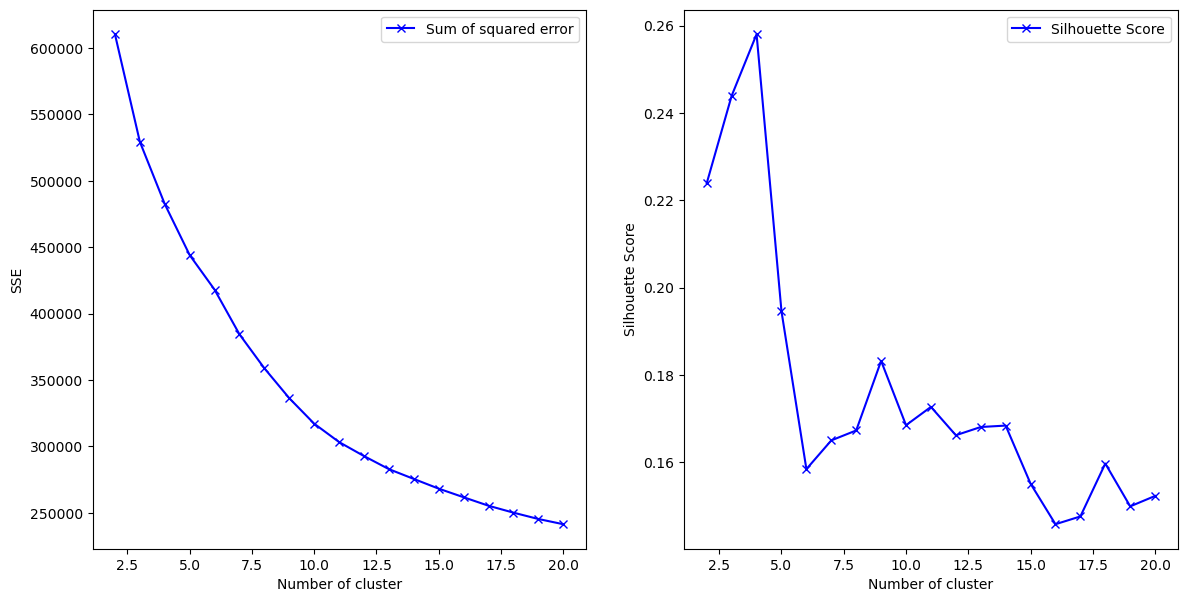

In [51]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(n_cluster_list, elbow,'bx-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(n_cluster_list, ss,'bx-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [52]:
K = n_cluster_list[ss.index(max(ss))]
print('Best k is: ', K)

Best k is:  4


In [53]:
kmeans_optimal = KMeans(n_clusters=K, random_state=555)
kmeans_optimal.fit(data_scaled)
final_clusters = kmeans_optimal.labels_

/rds/general/user/eg423/home/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
data['Cluster'] = final_clusters

In [55]:
data['Cluster'].value_counts()

Cluster
1    27878
2    17437
0     3386
3     3178
Name: count, dtype: int64

In [56]:
data['eid'] = data.index

In [57]:
data_cluster = data[['eid','Cluster']]

In [58]:
data_cluster

,eid,Cluster
eid,,
1000239,1000239,1
1000436,1000436,1
1000677,1000677,2
1000694,1000694,1
1000737,1000737,3
...,...,...
6024075,6024075,1
6024269,6024269,1
6024691,6024691,3


In [59]:
data_cluster.to_csv('../Dataset/cluster_id.csv', index=False)

In [60]:
validation_metric = pd.DataFrame({'elbow':elbow, 'ss':ss})

In [62]:
validation_metric.to_csv('../Dataset/cluster_measurement.csv', index=False)